<a href="https://colab.research.google.com/github/nmarkin/DL_corse/blob/main/HW3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
import os
import re
import numpy as np
import cv2

In [ ]:
!unzip /content/drive/MyDrive/DL_HSE/tiny-imagenet-2020.zip

In [3]:
def read_files(X, Y, path):
    files = os.listdir(path)
    for folder in sorted(files):
        num = int(re.split(r'_', folder)[-1])
        for name in os.listdir(path + '/' + folder):
            img = cv2.imread(path + '/' + folder + '/' + name)
            if img.shape != 0:
                X.append(img)
                Y.append(num)
        # print(num)
    return X, Y

In [4]:
path = "tiny-imagenet-200"
X_train, X_test = [], []
Y_train, Y_test = [], []

X_train, Y_train = read_files(X_train, Y_train, path + '/train')
X_test, Y_test = read_files(X_test, Y_test, path + '/val')

In [5]:
X_train = np.array(X_train)
X_test = np.array(X_test)

Y_train = np.array(Y_train)
Y_test = np.array(Y_test)
print(X_train.shape, Y_train.shape)

(100000, 64, 64, 3) (100000,)


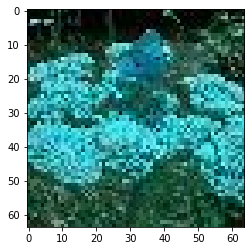

In [6]:
import skimage
import matplotlib.pyplot as plt
%matplotlib inline

# image = skimage.img_as_ubyte()
plt.imshow(X_train[0])

In [7]:
import torch
from torchvision import transforms as T
from torch.utils.data import DataLoader, Dataset


transform = T.Compose([T.ToTensor(),
                       T.Resize(256),
                       T.CenterCrop(224),
                       T.Normalize(mean=[0.485, 0.456, 0.406],
                                 std=[0.229, 0.224, 0.225])])

class ImageDataset(Dataset):
    def __init__(self, X, Y, transform):
        self.x = X
        self.y = Y
        self.transform = transform

    def __getitem__(self, index):
        img = self.x[index]
        if self.transform:
            img = self.transform(img)
        return img, self.y[index]

    def __len__(self):
        return len(self.x)

In [8]:
train_dataset = ImageDataset(X_train, Y_train, transform)
test_dataset = ImageDataset(X_test, Y_test, transform)

train_loader = DataLoader(dataset=train_dataset, batch_size=512, shuffle=True, drop_last=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=512, shuffle=True, drop_last=True)

In [9]:
for x, y in train_loader:
    print(x.shape, y.shape)
    break

torch.Size([512, 3, 224, 224]) torch.Size([512])


In [10]:
for x, y in test_loader:
    print(x.shape,y.shape)
    break

torch.Size([512, 3, 224, 224]) torch.Size([512])


In [11]:
import torchvision.models as models
import torch.optim as optim

model = models.resnet18(pretrained=True)
_ = model.cuda()

criterion = torch.nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), 1e-3)
num_epochs = 20

Downloading: "https://download.pytorch.org/models/resnet18-5c106cde.pth" to /root/.cache/torch/hub/checkpoints/resnet18-5c106cde.pth


Epoch 19/20	 Loss mean: 0.001310	 Accuracy mean: 0.999710
Epoch 19/20	 Val Loss mean: 2.168487	 Val Accuracy mean: 0.603824


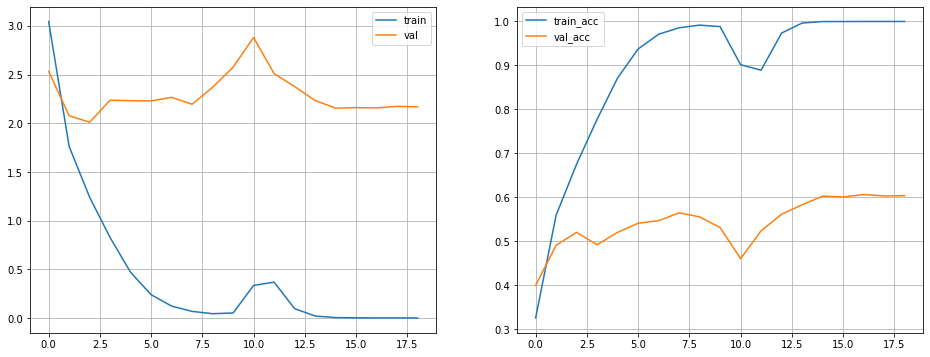

Epoch: 20 	Loss: 0.000400
Epoch: 20 	Loss: 0.000437
Epoch: 20 	Loss: 0.000477
Epoch: 20 	Loss: 0.000439
Epoch: 20 	Loss: 0.000416
Epoch: 20 	Loss: 0.000414
Epoch: 20 	Loss: 0.000384
Epoch: 20 	Loss: 0.000445
Epoch: 20 	Loss: 0.005743
Epoch: 20 	Loss: 0.000425
Epoch: 20 	Loss: 0.000379
Epoch: 20 	Loss: 0.000387
Epoch: 20 	Loss: 0.000390
Epoch: 20 	Loss: 0.000436
Epoch: 20 	Loss: 0.000421
Epoch: 20 	Loss: 0.000406
Epoch: 20 	Loss: 0.000389
Epoch: 20 	Loss: 0.000341
Epoch: 20 	Loss: 0.000371
Epoch: 20 	Loss: 0.004493
Epoch: 20 	Loss: 0.005200
Epoch: 20 	Loss: 0.000431
Epoch: 20 	Loss: 0.000424
Epoch: 20 	Loss: 0.000390
Epoch: 20 	Loss: 0.000390
Epoch: 20 	Loss: 0.000464
Epoch: 20 	Loss: 0.000355
Epoch: 20 	Loss: 0.000406
Epoch: 20 	Loss: 0.004638
Epoch: 20 	Loss: 0.000453
Epoch: 20 	Loss: 0.000407
Epoch: 20 	Loss: 0.000374
Epoch: 20 	Loss: 0.000755
Epoch: 20 	Loss: 0.000405
Epoch: 20 	Loss: 0.007151
Epoch: 20 	Loss: 0.000365
Epoch: 20 	Loss: 0.004741
Epoch: 20 	Loss: 0.000373
Epoch: 20 	L

In [12]:
from IPython.display import clear_output

hist = {"train_loss": [],
        "train_acc": [],
        "val_loss": [],
        "val_acc": []}

for i in range(num_epochs):
    if i>0:
         print("Epoch %d/%d\t Loss mean: %f\t Accuracy mean: %f"% \
               (i, num_epochs, epoch_loss, epoch_acc))
         print("Epoch %d/%d\t Val Loss mean: %f\t Val Accuracy mean: %f"% \
               (i, num_epochs, val_loss, val_acc))
    
         plt.figure(figsize=(16, 6))
         plt.subplot(121)
         plt.plot(hist['train_loss'], label='train')
         plt.plot(hist['val_loss'], label='val')
         plt.legend()
         plt.grid()
        
         plt.subplot(122)
         plt.plot(hist['train_acc'], label='train_acc')
         plt.plot(hist['val_acc'], label='val_acc')
         plt.legend()
         plt.grid()
         plt.show()

    epoch_losses = []
    epoch_acc = []
    val_losses = []
    val_acc = []
    
    model.train()
    for k, (X, Y) in enumerate(train_loader):  
        optimizer.zero_grad()
        y_pred = model(X.cuda())
        loss = criterion(y_pred, Y.cuda())
        
        loss.backward()
        optimizer.step()
        epoch_losses.append(loss.item())
        acc = (torch.argmax(y_pred.detach().cpu(), 1) == Y.cpu()).sum()/len(Y)
        epoch_acc.append(acc)
        
        if k%5 == 0:
            print("Epoch: %d \tLoss: %f"%(i+1, loss.item()))
    
    epoch_loss = np.mean(np.array(epoch_losses))
    epoch_acc = np.mean(np.array(epoch_acc))
    hist['train_acc'].append(epoch_acc)
    hist['train_loss'].append(epoch_loss)

    with torch.no_grad():
        model.eval()
        for k, (X, Y) in enumerate(test_loader):
            y_pred = model(X.cuda())
            loss = criterion(y_pred, Y.cuda())
            acc = (torch.argmax(y_pred.detach().cpu(), 1) == Y.cpu()).sum()/len(Y)
            val_losses.append(loss.item())
            val_acc.append(acc)
            
            
            
    val_loss = np.mean(np.array(val_losses))
    val_acc = np.mean(np.array(val_acc))
    hist['val_loss'].append(val_loss)
    hist['val_acc'].append(val_acc)
    if i < (num_epochs - 1):
        clear_output()
    